In [1]:
#Data manipulation and analysis
import pandas as pd
#Numerical operations and array computations.
import numpy as np
#Standardizes features by removing the mean and scaling to unit variance.
#Converts categorical text data into model-understandable numerical data.
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Clustering algorithms
from sklearn.cluster import KMeans
#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#PCA (Principal Component Analysis) for dimensionality reduction.
from sklearn.decomposition import PCA
#Functions for splitting data and selecting parameters.Divides data into training and testing sets.
from sklearn.model_selection import train_test_split
#RandomForest algorithm
from sklearn.ensemble import RandomForestClassifier
#Metrics to evaluate models
from sklearn.metrics import accuracy_score, silhouette_score


# Sample size
n = 10000  # Increased sample size for more diversity

np.random.seed(42)  # for reproducibility

# Generate random data
data = {
    'Customer ID' : range(1, n + 1),
    'Transaction Frequency': np.random.poisson(5, n) + 1, # Assuming an average of 5 transactions a month
    'Transaction Amount': np.random.exponential(200, n).round(2), # Skewed towards smaller transactions
    'Transaction Type': np.random.choice(['Online', 'Offline', 'Mobile', 'ATM', 'POS'], n, p=[0.4, 0.25, 0.15, 0.1, 0.1]),
    'Transaction Time': pd.date_range(start='2020-01-01', end='2020-12-31', freq='H').to_numpy()[np.random.choice(a=np.arange(8760), size=n)], 
    'Geographical Location': np.random.choice(['North', 'South', 'East', 'West', 'Central', 'International'], n),
    'Credit vs. Debit': np.random.choice(['Credit', 'Debit'], n, p=[0.7, 0.3]),
    'Merchant Category': np.random.choice(['Groceries', 'Entertainment', 'Electronics', 'Fashion', 'Travel', 'Utilities', 'Dining'], n),
    'Investment Patterns': np.random.choice(['Stocks', 'Bonds', 'Real Estate', 'Cryptocurrency', 'Mutual Funds', 'Savings Account'], n),
    'Loan and Credit Data': np.random.choice(['Personal Loan', 'Mortgage', 'Credit Card Debt', 'Student Loan', 'Car Loan', 'No Loan'], n),
    'Customer Age': np.random.choice(np.arange(18, 81), n, p=np.concatenate([np.repeat(1/81, 45), np.repeat(2/81, 18)])),
    'Customer Gender': np.random.choice(['Male', 'Female', 'Other'], n, p=[0.48, 0.48, 0.04]),
    'Employment Status': np.random.choice(['Employed', 'Self-Employed', 'Unemployed', 'Retired', 'Student'], n),
    'Account Balance' : np.random.normal(loc=5000, scale=1500, size=n).clip(min=0).round(2), # Positive normal distribution
    'Account Type' : np.random.choice(['Savings', 'Checking', 'Joint', 'Business'], n),
    'Customer Tenure with Bank' : np.random.randint(1, 21, n) , # 1 to 20 years
    'Number of Accounts' : np.random.poisson(2, n) + 1 , # 1-3 on average
    'Digital Transactions' : np.random.poisson(10, n) + 1 , # 1-11 on average
    'International Transactions' : np.random.poisson(2, n),  # 0-3 on average
    'Customer Education' : np.random.choice(['High School', 'Bachelor\'s', 'Master\'s', 'PhD'], n),
    'Customer Marital Status' : np.random.choice(['Single', 'Married', 'Divorced', 'Widowed'], n),
    'Customer Dependents' : np.random.poisson(1, n) , # 0-2 on average
    'Home Ownership' : np.random.choice(['Owns', 'Rents', 'Lives with Family'], n),
    'Recent Activity Score' : np.random.uniform(0, 10, n).round(2),  # Scale of 0-10
    'Customer Satisfaction Score' : np.random.uniform(0, 10, n).round(2),  # Scale of 0-10

}

pd.set_option('display.max_columns', None)
# Convert to DataFrame
df = pd.DataFrame(data)


In [2]:
# understanding data 
print(df.shape)  #Check the number of rows and columns in your dataset.
print(df.dtypes) #Understand the data types you have. Are they integers, floats, strings, or dates?
print(df.head()) #Peek into the initial rows of the dataset to get a feel of the data.
print(df.describe()) #Generate descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset's distribution.
print(df.describe(include=['O']))  # 'O' stands for object, i.e., string data types.
print(df.isnull().sum()) #Missing Values

(10000, 25)
Customer ID                             int64
Transaction Frequency                   int32
Transaction Amount                    float64
Transaction Type                       object
Transaction Time               datetime64[ns]
Geographical Location                  object
Credit vs. Debit                       object
Merchant Category                      object
Investment Patterns                    object
Loan and Credit Data                   object
Customer Age                            int32
Customer Gender                        object
Employment Status                      object
Account Balance                       float64
Account Type                           object
Customer Tenure with Bank               int32
Number of Accounts                      int32
Digital Transactions                    int32
International Transactions              int32
Customer Education                     object
Customer Marital Status                object
Customer Dependents   

In [3]:
features = df[['Transaction Amount','Transaction Frequency','Account Balance','Customer Age']]
# One-hot encoding, Converts categorical data into a format that can be provided to ML algorithms.
features_encoded = pd.get_dummies(features, drop_first=True)

# Normalize the data, Adjusts values measured on different scales to a notionally common scale.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features_encoded)

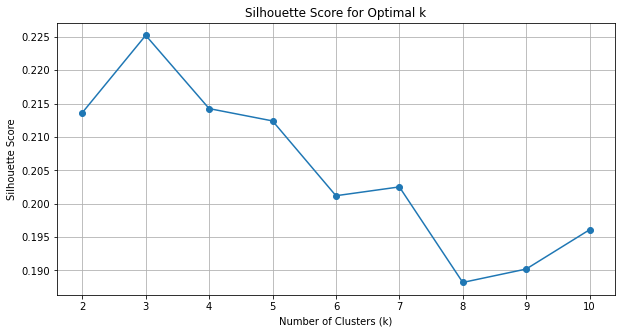

Optimal k: 3


In [33]:
# Perform k-means clustering. To segment customers into different groups based on their transactional details.
from sklearn.cluster import KMeans
#Used to determine the best number of clusters by measuring the similarity of an object to its own cluster
#compared to other clusters.
from sklearn.metrics import silhouette_score

# Choose a range of 'k' values to determine the optimal number of clusters
k_range = range(2, 11)
silhouette_scores = []

#random state is results are reproducible every time the code is run 42 common use
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    df['Cluster'] = kmeans.fit_predict(features_normalized)
    
    # Calculate the silhouette score for each 'k'
    silhouette_avg = silhouette_score(features_normalized, df['Cluster'])
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores to choose the optimal 'k'
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.grid(True)
plt.show()

# Based on the silhouette score, choose the optimal 'k'
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f'Optimal k: {optimal_k}')

# Now, you have determined the optimal 'k' for clustering based on the silhouette score.
# You can proceed with clustering using this optimal 'k' value.
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_normalized)

In [5]:
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, max_iter=300, random_state=42)
# it first trains the model using the provided data and then immediately assigns each data point to a cluster.
clusters = kmeans.fit_predict(features_normalized)

df['Cluster'] = clusters

print(df.head())

   Customer ID  Transaction Frequency  Transaction Amount Transaction Type  \
0            1                      6              238.77              ATM   
1            2                      5              167.66              POS   
2            3                      5              133.30           Mobile   
3            4                      6               45.32              ATM   
4            5                      6              416.62          Offline   

     Transaction Time Geographical Location Credit vs. Debit  \
0 2020-10-28 05:00:00         International           Credit   
1 2020-03-31 16:00:00                  West           Credit   
2 2020-12-20 13:00:00         International            Debit   
3 2020-02-19 08:00:00                  West            Debit   
4 2020-04-23 17:00:00                  West           Credit   

  Merchant Category Investment Patterns Loan and Credit Data  Customer Age  \
0       Electronics     Savings Account              No Loan        

In [6]:
# Now, let's interpret the clusters
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_df = pd.DataFrame(cluster_centers, columns=features_encoded.columns)

# Display the cluster centers (average values for each feature within each cluster)
print("Cluster Centers:")
print(cluster_df)

Cluster Centers:
   Transaction Amount  Transaction Frequency  Account Balance  Customer Age
0          563.855826               5.987960      4953.425532     56.878930
1          131.051202               6.005668      5012.868613     67.670648
2          140.946266               5.998597      5013.797324     33.446564


In [7]:
for cluster in df['Cluster'].unique():
    print(f"Cluster {cluster}")
    print(df[df['Cluster'] == cluster].describe())
    print("=====================================")

Cluster 2
        Customer ID  Transaction Frequency  Transaction Amount  Customer Age  \
count   3564.000000            3564.000000         3564.000000   3564.000000   
mean    5006.037598               5.998597          140.902219     33.441639   
std     2913.593148               2.214500          111.565585      9.542655   
min        1.000000               1.000000            0.300000     18.000000   
25%     2469.000000               4.000000           47.565000     25.000000   
50%     5062.000000               6.000000          113.900000     33.000000   
75%     7518.250000               7.000000          212.972500     42.000000   
max    10000.000000              15.000000          503.700000     50.000000   

       Account Balance  Customer Tenure with Bank  Number of Accounts  \
count      3564.000000                3564.000000         3564.000000   
mean       5013.286246                  10.361953            3.002806   
std        1507.477086                   5.786041 

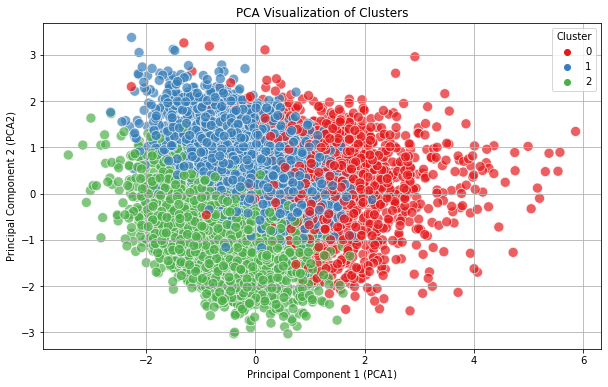

In [8]:
# Perform PCA for dimensionality reduction
#The resulting plot will show our data in 2 dimensions with each point coloured based on its cluster assignment.
pca = PCA(n_components=2)  # Reduce to 2 principal components for 2D visualization
pca_result = pca.fit_transform(features_normalized)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])

# Concatenate the PCA DataFrame with the cluster labels
clustered_pca_df = pd.concat([pca_df, df['Cluster']], axis=1)

# Visualize the data in 2D space with cluster colors
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=clustered_pca_df, palette='Set1', s=100, alpha=0.7)
plt.title('PCA Visualization of Clusters')
plt.xlabel('Principal Component 1 (PCA1)')
plt.ylabel('Principal Component 2 (PCA2)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [9]:
# Group the data by the 'Cluster' column
clustered_data = df.groupby('Cluster')

df_aggregated = clustered_data.agg({
    'Transaction Frequency': 'mean',
    'Transaction Amount': 'median',
    'Merchant Category': lambda x:x.value_counts().index[0],  # Most common type
    'Account Balance': 'mean',
    #... add other columns as needed
})
print(df_aggregated)

         Transaction Frequency  Transaction Amount Merchant Category  \
Cluster                                                                
0                     5.988629              506.61       Electronics   
1                     6.005464              111.68         Groceries   
2                     5.998597              113.90     Entertainment   

         Account Balance  
Cluster                   
0            4951.722381  
1            5013.752771  
2            5013.286246  


In [10]:
# Add random noise to 'Transaction Amount' and 'Account Balance'
np.random.seed(42)  # for reproducibility
for cluster in df['Cluster'].unique():
    df.loc[df['Cluster'] == cluster, 'Customer Satisfaction Score'] = df.loc[df['Cluster'] == cluster, 'Customer Satisfaction Score'].apply(lambda x: x + np.random.normal(0, 10))
    df.loc[df['Cluster'] == cluster, 'Account Balance'] = df.loc[df['Cluster'] == cluster, 'Account Balance'].apply(lambda x: x + np.random.normal(0, 100))

# Clip values to make sure they are not negative
df['Customer Satisfaction Score'] = df['Customer Satisfaction Score'].clip(lower=0)
df['Account Balance'] = df['Account Balance'].clip(lower=0)

print(df.head())

   Customer ID  Transaction Frequency  Transaction Amount Transaction Type  \
0            1                      6              238.77              ATM   
1            2                      5              167.66              POS   
2            3                      5              133.30           Mobile   
3            4                      6               45.32              ATM   
4            5                      6              416.62          Offline   

     Transaction Time Geographical Location Credit vs. Debit  \
0 2020-10-28 05:00:00         International           Credit   
1 2020-03-31 16:00:00                  West           Credit   
2 2020-12-20 13:00:00         International            Debit   
3 2020-02-19 08:00:00                  West            Debit   
4 2020-04-23 17:00:00                  West           Credit   

  Merchant Category Investment Patterns Loan and Credit Data  Customer Age  \
0       Electronics     Savings Account              No Loan        

In [11]:
# Define age ranges
age_bins = [0, 18, 30, 40, 50, 60, 70, 120]
age_labels = ['<18', '18-29', '30-39', '40-49', '50-59', '60-69', '70+']

# Define transaction frequency ranges
transaction_frequency_bins = [0, 2, 5, 10, 20, 50, float('inf')]
transaction_frequency_labels = ['<2', '2-4', '5-9', '10-19', '20-49', '50+']

# Generalize the 'Customer Age' and 'Transaction Frequency' columns
for cluster in df['Cluster'].unique():
    df.loc[df['Cluster'] == cluster, 'Customer Age'] = pd.cut(df.loc[df['Cluster'] == cluster, 'Customer Age'], bins=age_bins, labels=age_labels, right=False)
    df.loc[df['Cluster'] == cluster, 'Transaction Frequency'] = pd.cut(df.loc[df['Cluster'] == cluster, 'Transaction Frequency'], bins=transaction_frequency_bins, labels=transaction_frequency_labels, right=False)

print(df.head())

   Customer ID Transaction Frequency  Transaction Amount Transaction Type  \
0            1                   5-9              238.77              ATM   
1            2                   5-9              167.66              POS   
2            3                   5-9              133.30           Mobile   
3            4                   5-9               45.32              ATM   
4            5                   5-9              416.62          Offline   

     Transaction Time Geographical Location Credit vs. Debit  \
0 2020-10-28 05:00:00         International           Credit   
1 2020-03-31 16:00:00                  West           Credit   
2 2020-12-20 13:00:00         International            Debit   
3 2020-02-19 08:00:00                  West            Debit   
4 2020-04-23 17:00:00                  West           Credit   

  Merchant Category Investment Patterns Loan and Credit Data Customer Age  \
0       Electronics     Savings Account              No Loan        40-49  

In [12]:
df['Customer ID'] = range(12345, 12345 + len(df))

print(df.head())

   Customer ID Transaction Frequency  Transaction Amount Transaction Type  \
0        12345                   5-9              238.77              ATM   
1        12346                   5-9              167.66              POS   
2        12347                   5-9              133.30           Mobile   
3        12348                   5-9               45.32              ATM   
4        12349                   5-9              416.62          Offline   

     Transaction Time Geographical Location Credit vs. Debit  \
0 2020-10-28 05:00:00         International           Credit   
1 2020-03-31 16:00:00                  West           Credit   
2 2020-12-20 13:00:00         International            Debit   
3 2020-02-19 08:00:00                  West            Debit   
4 2020-04-23 17:00:00                  West           Credit   

  Merchant Category Investment Patterns Loan and Credit Data Customer Age  \
0       Electronics     Savings Account              No Loan        40-49  

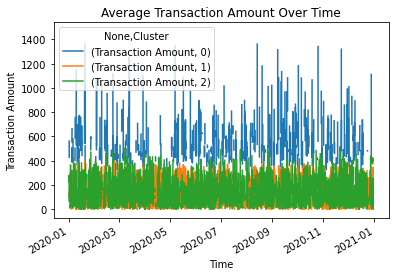

In [13]:
# Visualize average transaction amounts over time for each cluster
df.groupby(['Cluster', 'Transaction Time']).agg({'Transaction Amount': 'mean'}).unstack('Cluster').plot()
plt.title("Average Transaction Amount Over Time")
plt.ylabel("Transaction Amount")
plt.xlabel("Time")
plt.show()

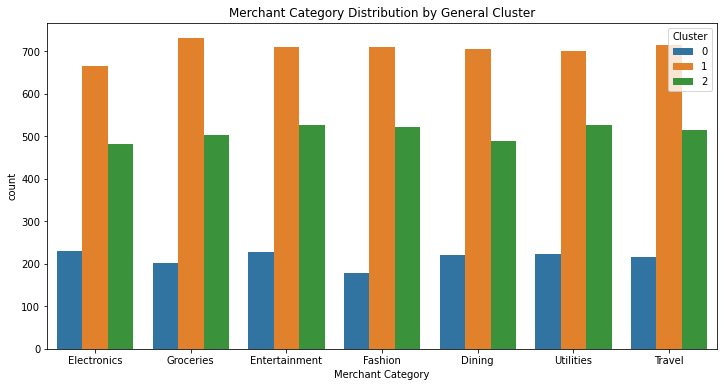

In [14]:
# Visualize the most common 'Merchant Category' per cluster
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Merchant Category', hue='Cluster')
plt.title("Merchant Category Distribution by General Cluster")
plt.show()

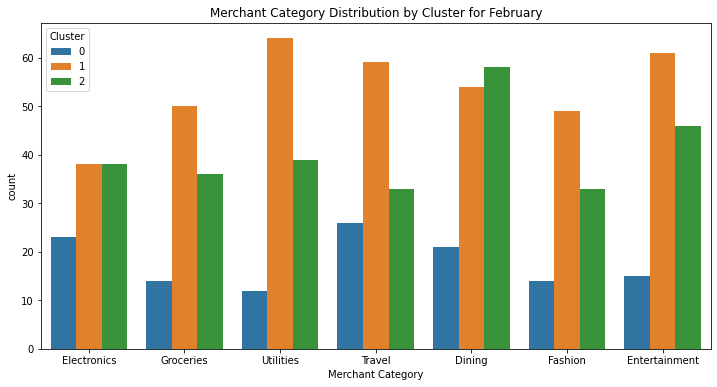

In [15]:
# Filter data for the month of February
february_data = df[df['Transaction Time'].dt.month == 2]

# Visualize the most common 'Merchant Category' for February per cluster
plt.figure(figsize=(12,6))
sns.countplot(data=february_data, x='Merchant Category', hue='Cluster')
plt.title("Merchant Category Distribution by Cluster for February")
plt.show()


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Convert 'Transaction Time' to separate features
df['Transaction Year'] = df['Transaction Time'].dt.year
df['Transaction Month'] = df['Transaction Time'].dt.month
df['Transaction Day'] = df['Transaction Time'].dt.day
df['Transaction Hour'] = df['Transaction Time'].dt.hour
df['Transaction Minute'] = df['Transaction Time'].dt.minute

# Drop the original 'Transaction Time' column
df = df.drop(['Transaction Time'], axis=1)

# Convert 'Investment Patterns' to binary (interested in 'Cryptocurrency' = 1, otherwise = 0)
df['Interested in Crypto'] = df['Investment Patterns'].apply(lambda x: 1 if x == 'Cryptocurrency' else 0)

X = pd.get_dummies(df.drop(['Interested in Crypto', 'Investment Patterns'], axis=1))
y = df['Interested in Crypto']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 0.849


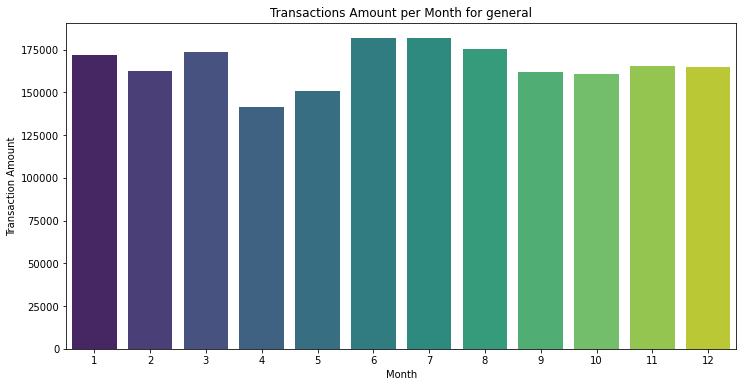

In [30]:
# Group the data by 'Month' and sum the 'Transaction Amount'

monthly_data = df.groupby('Transaction Month')['Transaction Amount'].sum()

plt.figure(figsize=(12,6))
sns.barplot(x=monthly_data.index, y=monthly_data.values, palette='viridis')
plt.title('Transactions Amount per Month for general')
plt.xlabel('Month')
plt.ylabel('Transaction Amount')
plt.show()

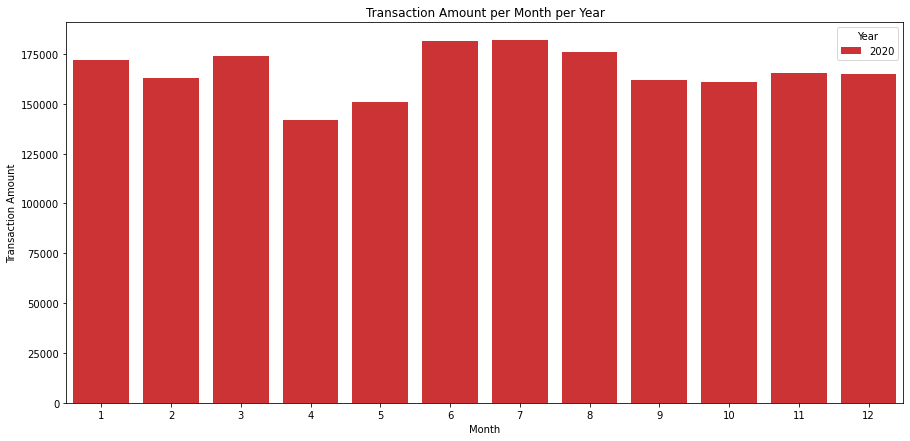

In [29]:
# Group by both 'Year' and 'Month', then sum the 'Transaction Amount'
monthly_data = df.groupby(['Transaction Year', 'Transaction Month'])['Transaction Amount'].sum().reset_index()

plt.figure(figsize=(15,7))
sns.barplot(x='Transaction Month', y='Transaction Amount', hue='Transaction Year', data=monthly_data, palette='Set1')
plt.title('Transaction Amount per Month per Year')
plt.xlabel('Month')
plt.ylabel('Transaction Amount')
plt.legend(title='Year')
plt.show()


In [31]:
# Group the data by Customer ID and calculate the mean and standard deviation for each feature
behavioral_profiles_mean = df.groupby('Customer ID').mean()
behavioral_profiles_std = df.groupby('Customer ID').std()

# Combine the mean and standard deviation into a single DataFrame
behavioral_profiles = pd.concat([behavioral_profiles_mean, behavioral_profiles_std], axis=1)

# Rename the columns
columns = []
for column in behavioral_profiles_mean.columns:
    columns.append(column + ' Mean')
for column in behavioral_profiles_std.columns:
    columns.append(column + ' Std')
behavioral_profiles.columns = columns

#print(behavioral_profiles.head())

#added anomaly data
df.at[100, 'Transaction Amount'] = 1000000
df.at[200, 'Transaction Amount'] = 1000000

# Compute the Z-scores for 'Transaction Amount'. 
transaction_amount = df['Transaction Amount']
#z_scores is a measure that describes a value's relationship to the mean of a group of values 
z_scores = (transaction_amount - transaction_amount.mean()) / transaction_amount.std()

# Set a threshold (e.g. 3 or -3)
#when a data point has a Z-score greater than 3 or less than -3, it signifies that the data point is quite rare and
#is not part of the 99.7% of the data
threshold = 3

# Get boolean series for a value exceeding the threshold
exceeds_threshold = (z_scores.abs() > threshold)

# Get the transactions that exceed the threshold
anomalies = df[exceeds_threshold]

print(anomalies)

     Customer ID Transaction Frequency  Transaction Amount Transaction Type  \
100        12445                   5-9           1000000.0          Offline   
200        12545                   2-4           1000000.0           Online   

    Geographical Location Credit vs. Debit Merchant Category  \
100               Central            Debit       Electronics   
200               Central            Debit     Entertainment   

    Investment Patterns Loan and Credit Data Customer Age Customer Gender  \
100     Savings Account              No Loan        40-49          Female   
200               Bonds              No Loan        60-69          Female   

    Employment Status  Account Balance Account Type  \
100           Student      5163.698623     Business   
200     Self-Employed      4508.649161     Business   

     Customer Tenure with Bank  Number of Accounts  Digital Transactions  \
100                         15                   3                    13   
200                

In [32]:
# Generate alerts from the anomalies
alerts = anomalies[['Transaction Amount']]

# Add a message
alerts['Message'] = 'Transaction significantly different from typical behavior'

print(alerts)

     Transaction Amount                                            Message
100           1000000.0  Transaction significantly different from typic...
200           1000000.0  Transaction significantly different from typic...


C:\Users\ASUS\AppData\Local\Temp\ipykernel_15700\2711407156.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alerts['Message'] = 'Transaction significantly different from typical behavior'
